#             PROJECT - Unsupervised Learning

-------

# PART A

_____

## 1. Data Understanding & Exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
from sklearn import tree
from os import system

### Reading ‘Car name.csv’ as a DataFrame and assign it to a variable "df1"

In [2]:
df1 = pd.read_csv("Car name.csv")
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
df1.shape

(398, 1)

### Read ‘Car-Attributes.json as a DataFrame and assign it to a variable "df2"

In [4]:
import json
df2 = pd.read_json("Car-Attributes.json")

In [5]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df2.shape

(398, 8)

### Merging both the DataFrames 'df_car' and 'df_at' together to form a single DataFrame 'dfm'

In [7]:
dfm = pd.merge(df1, df2, left_index=True, right_index=True)

In [8]:
dfm.head(305)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
300,oldsmobile cutlass salon brougham,23.9,8,260.0,90,3420,22.2,79,1
301,plymouth horizon,34.2,4,105.0,70,2200,13.2,79,1
302,plymouth horizon tc3,34.5,4,105.0,70,2150,14.9,79,1
303,datsun 210,31.8,4,85.0,65,2020,19.2,79,3


In [9]:
dfm.shape

(398, 9)

In [10]:
dfm.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [11]:
dfm.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [12]:
#dfm['hp'] = dfm['hp'].astype(float)
#dfm.hp.unique()

### Printing 5 point summary of the numerical features and finding insights

In [13]:
dfm.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


The five-number summary involves the calculation of 5 summary statistical quantities

1. Median- 50 Percentile
2. 1st Quartile- 25 Percentile
3. 3rd Quartile- 75 Percentile
4. Minimum
5. Maximum

out of 398 vehicles,
1. The minimum mpg found is 9 
2. The Maximum Mpg found is 46   
3. The number of Cylinders of a vehicle in the list ranges from 3 to 8
4. The lowest weight of the vehicle is 1613 units and Maximum weight is 5140 units
5. Displacement varies from 68 to 455 cubic units

------

## 2. Data Preparation

### Checking and printing feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [14]:
dfm.isnull().sum()*100/len(dfm)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

#### No Null elements are found in the dataframe
#### No need of Imputing

### Checking for unexpected values in all the features and datapoints 

In [15]:
temp = pd.DataFrame(dfm.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [16]:
# '?' is present in the hp coloumn, Using Imputer replacing the '?'

In [17]:
dfm['hp'] = dfm['hp'].apply(lambda x: np.nan if x == '?' else x)

In [18]:
dfm.head(130)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
125,plymouth duster,20.0,6,198.0,95.0,3102,16.5,74,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
127,amc hornet,19.0,6,232.0,100.0,2901,16.0,74,1
128,chevrolet nova,15.0,6,250.0,100.0,3336,17.0,74,1


In [19]:
dfm.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [20]:
dfm['hp'] = dfm['hp'].astype(float)

In [21]:
dfm['hp'].fillna(dfm['hp'].median(), inplace=True)

In [22]:
dfm.head(130) #line 32,126,330,336,354,374 had Nan

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
125,plymouth duster,20.0,6,198.0,95.0,3102,16.5,74,1
126,ford maverick,21.0,6,200.0,93.5,2875,17.0,74,1
127,amc hornet,19.0,6,232.0,100.0,2901,16.0,74,1
128,chevrolet nova,15.0,6,250.0,100.0,3336,17.0,74,1


### Checking for duplicate values in the data and imputing with the best suitable approach

In [23]:
duplicate = dfm[dfm.duplicated()]

In [24]:
duplicate.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


#### No duplicate Values are found
#### No need to impute

### Ploting a pairplot for all features

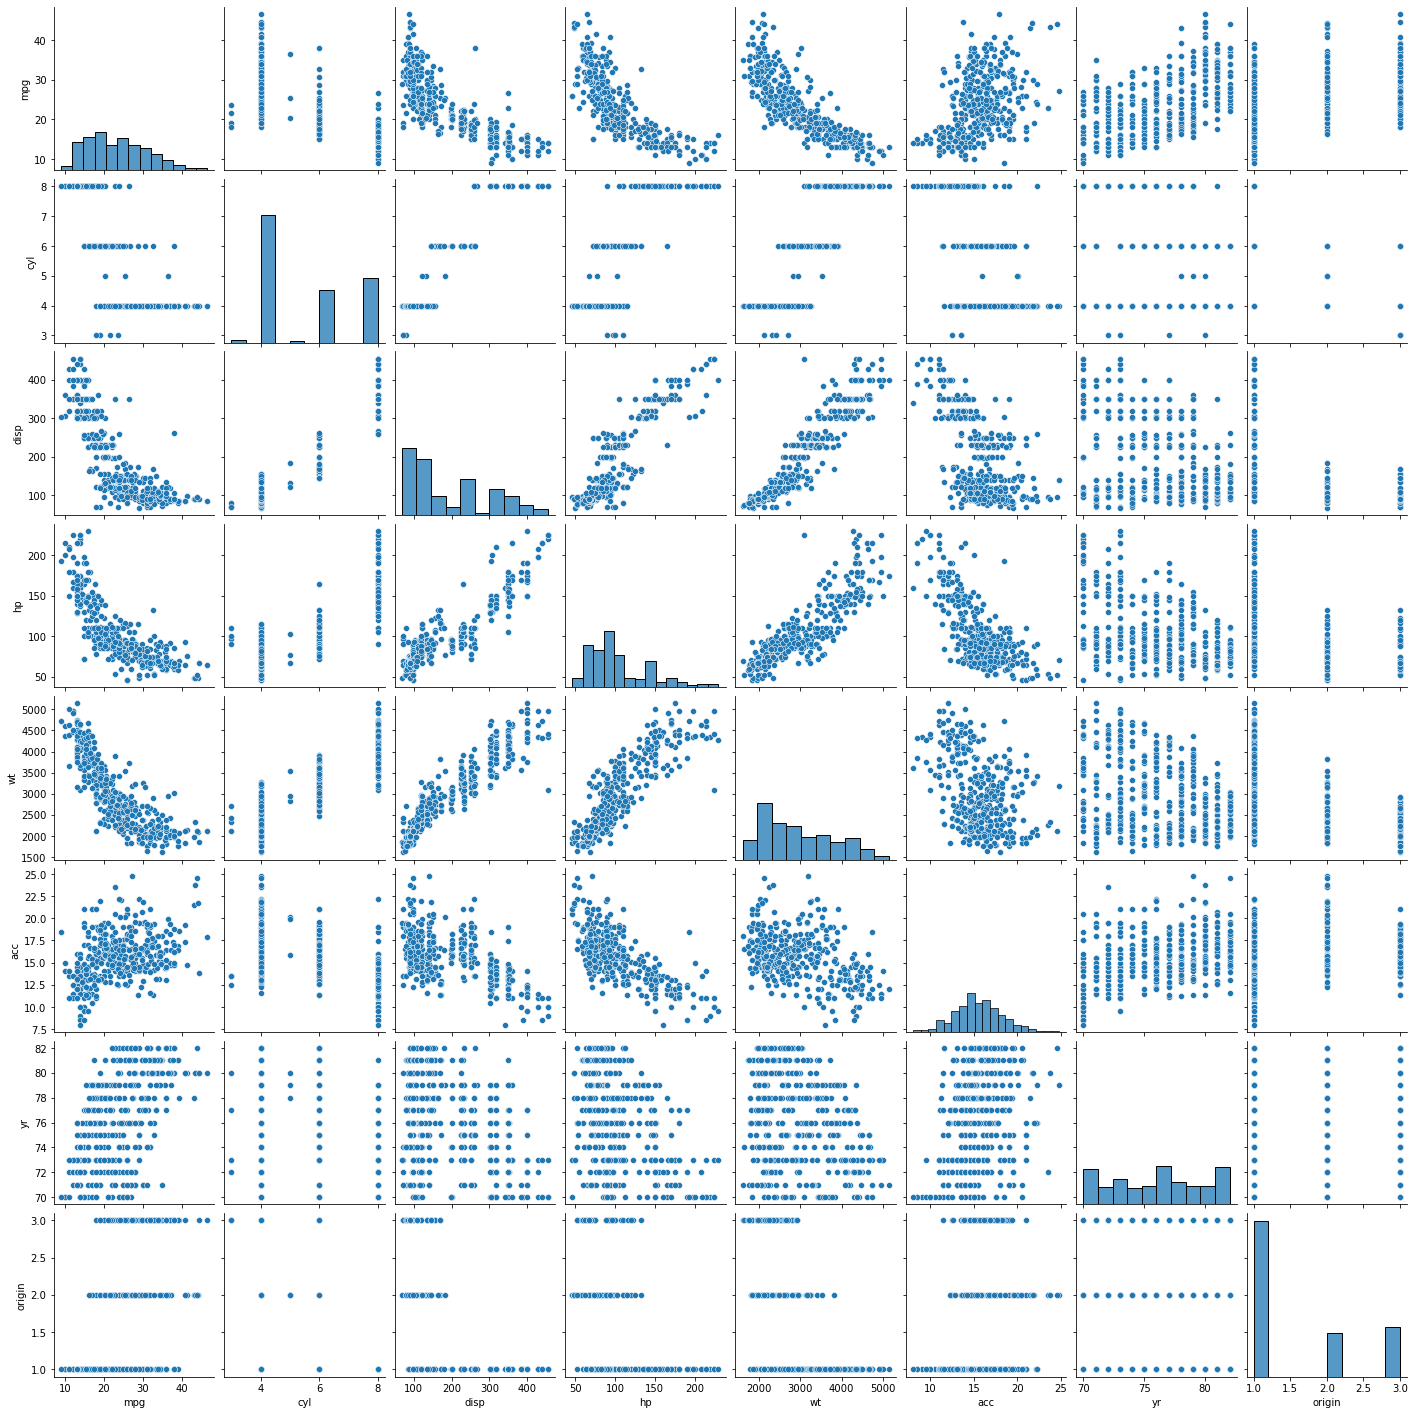

In [25]:
sns.pairplot(dfm)

### Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints are distinguishable by ‘cyl’

<AxesSubplot:xlabel='disp', ylabel='wt'>

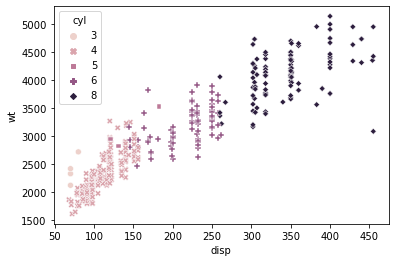

In [26]:
sns.scatterplot(data=dfm, x="disp", y="wt",hue="cyl", style="cyl")

In [27]:
dfm['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

### Insights 

1. weight of the Car depends on the number of Cylinders
2. As the Number of cylinders increases Weight of the car appears to be increasing 
3. There are few cars having high number of Cylinders, but belongs to lower weight Category. They can be considered as Outliers
4. There are few cars having low number of Cylinders, but belongs to higher weight Category. They can be considered as Outliers
5. Majority of the cars are four cylinders.
6. Only few cars are 3 or 5 cylinders

### Visualizing a scatterplot for ‘wt’ and ’mpg’. Datapoints are distinguishable by ‘cyl’

<AxesSubplot:xlabel='mpg', ylabel='wt'>

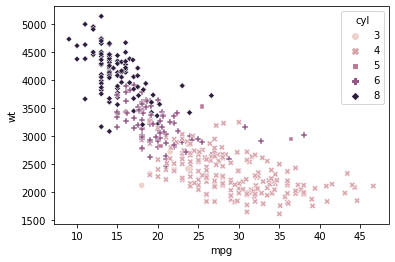

In [28]:
sns.scatterplot(data=dfm, x="mpg", y="wt",hue="cyl", style="cyl")

### Insights 

1. Weight and mpg is appear to be correlated
2. higher the weight, Lower the mpg
3. Number of cylinders increases, mpg decreases, weight incrases
4. Max Mpg is scored by a 4 cylinder engine car, but not the least weight
5. Some 6 Cylinder and 8cylinder cars with moderate weight has good mpg
6. A 3 cylinder car with low weight has poor mpg than other cars.
7. least weight and Minimum number of cylinders are not a criteria for good mpg


-----

## 3. Clustering

### Applying K-Means clustering for 2 to 10 clusters

In [29]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
dfm_original = dfm
dfm = dfm.drop(['car_name'], axis=1) #droping Car names

In [30]:
dfm.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [31]:
#Scaling the data
dfm_scaled = dfm.apply(zscore)
dfm_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145


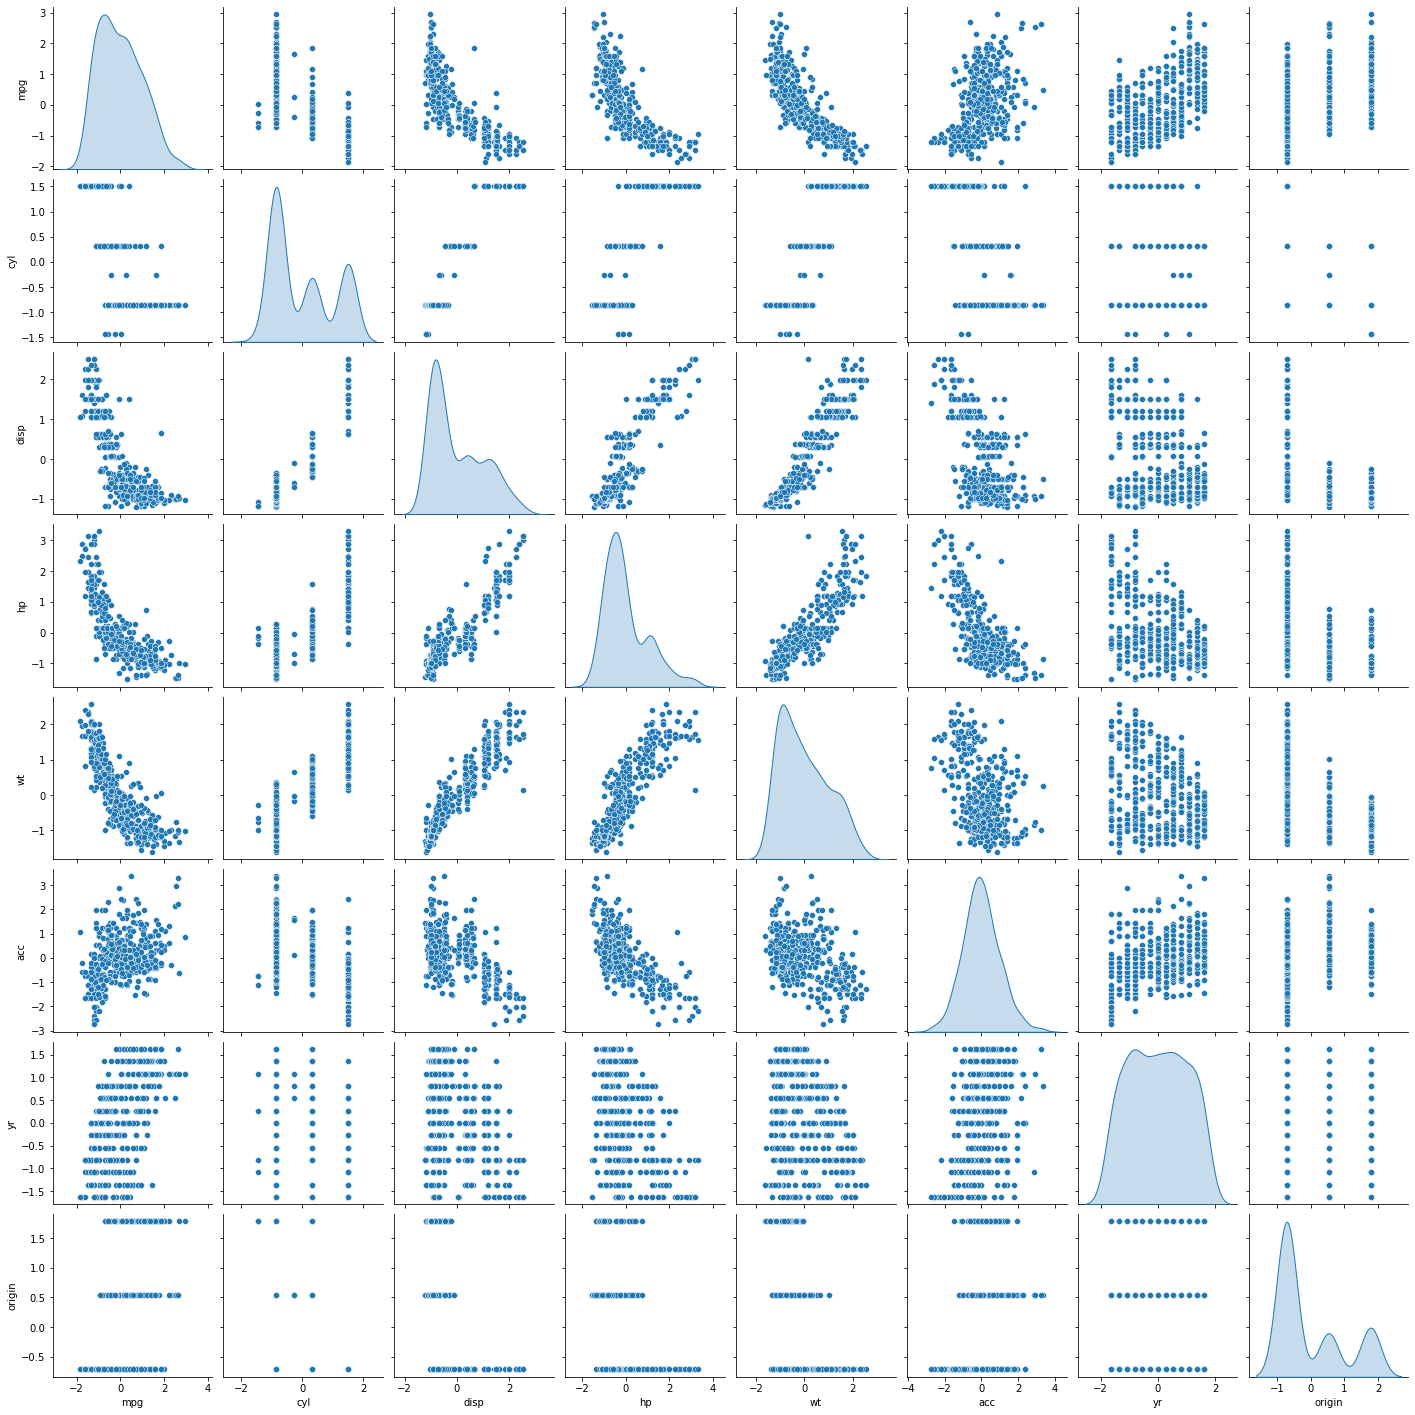

In [32]:
sns.pairplot(dfm_scaled,diag_kind='kde')

##### K-means Method 1

In [33]:
from scipy.spatial.distance import cdist
cluster_range = range( 2, 11 ) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(dfm_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1588.592457
1,3,1190.043653
2,4,988.068834
3,5,830.388082
4,6,751.642794
5,7,680.888588
6,8,633.683524
7,9,592.152159
8,10,573.709309


### Plot a visual and find elbow point

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

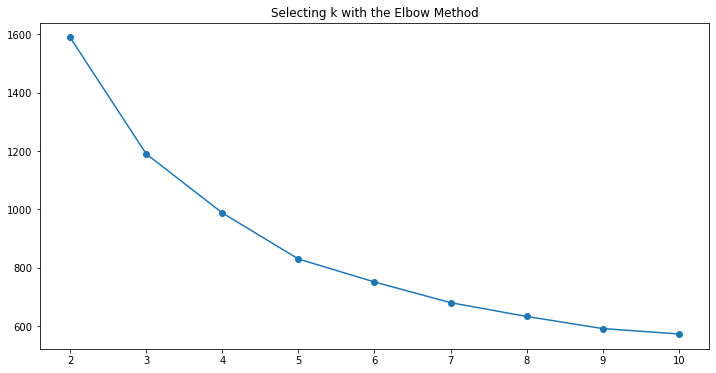

In [34]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title('Selecting k with the Elbow Method')

In [35]:
##### K-means Method 2 with elbow plot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

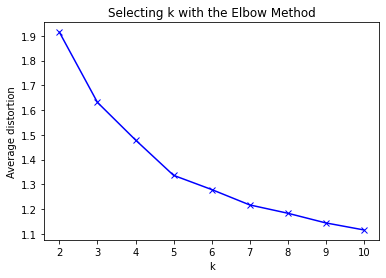

In [36]:
# Applying K Means Clustering for 2 to 10 clusters
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfm_scaled)
    prediction=model.predict(dfm_scaled)
    meanDistortions.append(sum(np.min(cdist(dfm_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfm_scaled.shape[0])

#Elbow plot
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### On the above visual, highlighting the possible Elbow points

##### The elbow plot confirms our visual analysis that there are likely 5 good clusters

### Training a K-means clustering model once again on the optimal number of clusters, k=5

In [37]:
# Droping the coloumn "origin"
dfm = dfm.drop(['origin'], axis=1)
dfm.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [38]:
#Scaling
dfm_scaled5 = dfm.apply(zscore)
dfm_scaled5.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [39]:
cluster = KMeans( n_clusters = 5, random_state = 2354 )
cluster.fit(dfm_scaled5)

prediction=cluster.predict(dfm_scaled5)

### Add a new feature in the DataFrame which will have labels based upon cluster value

In [40]:
dfm_scaled5["GROUP"] = prediction
dfm_scaled5.head(250)

,mpg,cyl,disp,hp,wt,acc,yr,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0
...,...,...,...,...,...,...,...,...
245,1.612243,-0.856321,-0.916334,-1.003391,-1.383845,-0.424109,0.538847,1
246,1.189500,-0.856321,-1.108385,-1.370127,-1.165111,1.391285,0.538847,1
247,2.034986,-0.856321,-1.041167,-0.898609,-1.064612,1.100822,0.538847,1
248,1.612243,-0.856321,-0.983552,-1.160564,-1.383845,0.302049,0.538847,1


### Plot a visual and color the datapoints based upon clusters

<AxesSubplot:xlabel='mpg', ylabel='wt'>

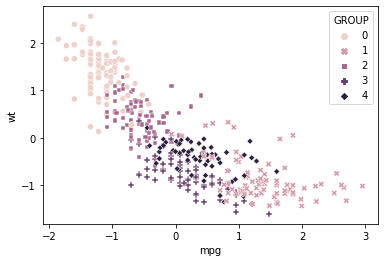

In [41]:
sns.scatterplot(data=dfm_scaled5, x="mpg", y="wt",hue="GROUP", style="GROUP")

<AxesSubplot:xlabel='cyl', ylabel='wt'>

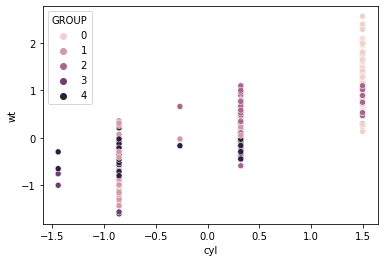

In [42]:
sns.scatterplot(data=dfm_scaled5, x="cyl", y="wt",hue="GROUP")

### Pass a new DataPoint and predict which cluster it belongs to.

In [43]:
#From the boxplot we can predict where the passed data point belongs to

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

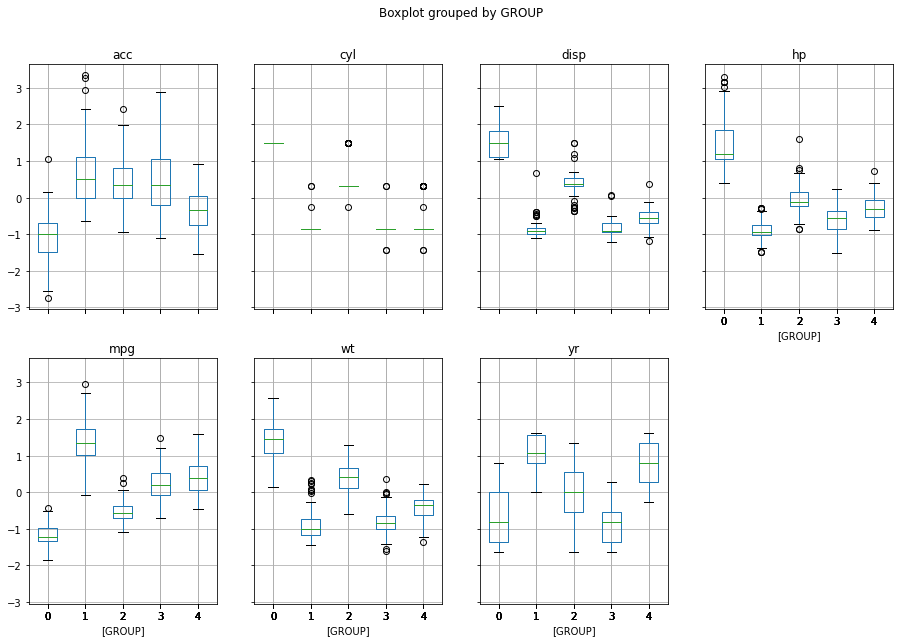

In [44]:
dfm_scaled5.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

-----

# PART B

------

## 1. Data Understanding & Cleaning

### Read ‘vehicle.csv’ and saving as DataFrame 'data'

In [45]:
data = pd.read_csv("vehicle.csv")
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [46]:
data.shape

(846, 19)

In [47]:
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [48]:
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### Checking percentage of missing values and imputing with correct approach

In [49]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [50]:
# imputing missing Values with mean 
from sklearn.impute import SimpleImputer

In [51]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

In [52]:
imputer = imputer.fit(data[['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2']])

In [53]:
data[['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2']] = imputer.transform(data[['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2']])

In [54]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [55]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Visualizing a Pie-chart and print percentage of values for variable ‘class’

In [56]:
data_coloumns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1','skewness_about.2', 'hollows_ratio']
data_coloumns

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio']

<AxesSubplot:ylabel='skewness_about.2'>

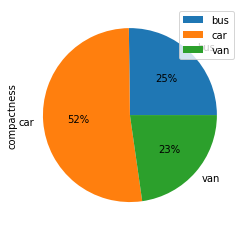

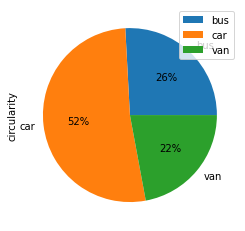

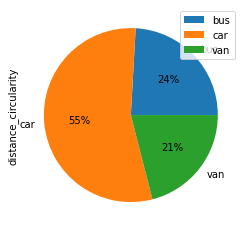

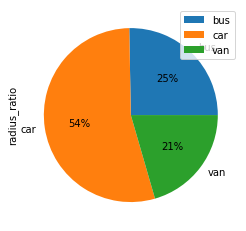

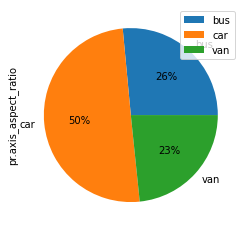

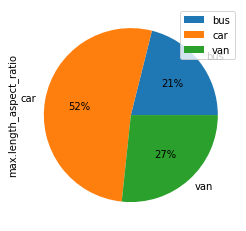

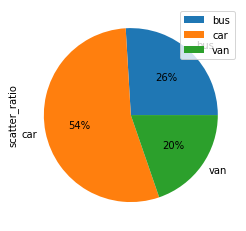

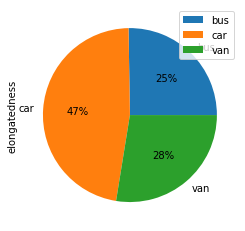

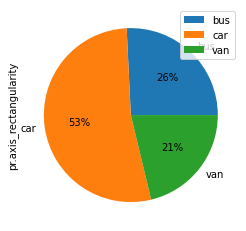

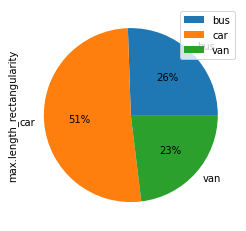

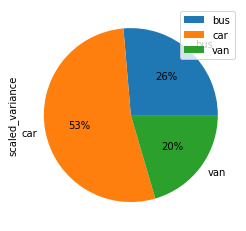

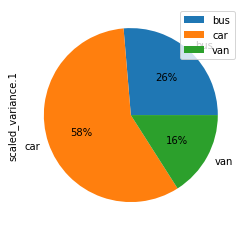

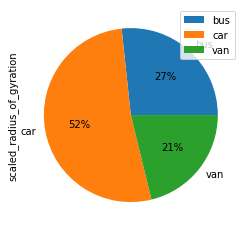

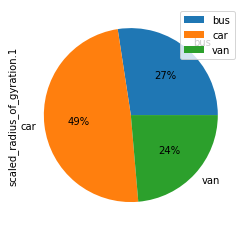

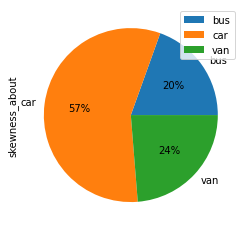

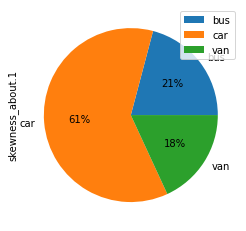

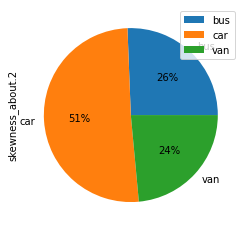

In [57]:
data.groupby(['class']).sum().plot(kind='pie', y='compactness', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='circularity', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='distance_circularity', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='radius_ratio', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='pr.axis_aspect_ratio', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='max.length_aspect_ratio', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='scatter_ratio', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='elongatedness', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='pr.axis_rectangularity', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='max.length_rectangularity', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='scaled_variance', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='scaled_variance.1', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='scaled_radius_of_gyration', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='scaled_radius_of_gyration.1', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='skewness_about', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='skewness_about.1', autopct='%1.0f%%')
data.groupby(['class']).sum().plot(kind='pie', y='skewness_about.2', autopct='%1.0f%%')

### Check for duplicate rows in the data and imputing with correct approach

In [58]:
data_duplicate = data[data.duplicated()]
data_duplicate.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


##### No duplicate Data is Found
##### No imputation required

-----

## 2. Data Preparation

### Split data into X and Y

In [59]:
X = data.drop("class", axis=1)
Y = data['class']
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [60]:
# Dividing the data to Test and Train
# Spliting data into train and test with 70:30 proportion

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [62]:
data.groupby(["class"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
car,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
van,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


### Standardizing the Data

In [63]:
#Standardising the Train data
XStd = X.apply(zscore)
XStd.shape

(846, 18)

In [64]:
XStd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,5.572112e-16,1.000592,-2.512695,-0.811520,-0.082445,0.768143,3.076880
circularity,846.0,-1.018361e-16,1.000592,-1.928651,-0.786846,-0.134387,0.681188,2.312338
distance_circularity,846.0,2.370051e-16,1.000592,-2.676060,-0.769150,-0.133514,1.010632,1.900523
radius_ratio,846.0,8.871286e-17,1.000592,-1.943427,-0.835032,-0.056160,0.782625,4.916638
pr.axis_aspect_ratio,846.0,3.732239e-16,1.000592,-1.863187,-0.593753,-0.085979,0.421794,9.688661
max.length_aspect_ratio,846.0,-2.036721e-16,1.000592,-1.428157,-0.340845,-0.123383,0.311542,10.097349
scatter_ratio,846.0,-4.391024e-16,1.000592,-1.714617,-0.659704,-0.358300,0.877456,2.896861
elongatedness,846.0,-8.582575e-17,1.000592,-1.913112,-1.016511,0.264347,0.648605,2.569893
pr.axis_rectangularity,846.0,-4.320159e-16,1.000592,-1.383974,-0.610886,-0.224342,0.935290,3.254554
max.length_rectangularity,846.0,7.968409e-16,1.000592,-2.067876,-0.758169,-0.137782,0.758332,2.757358


-----

## 3. Model Building

### Training a base Classification model using SVM

In [65]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)

### Print Classification metrics for train data

In [66]:
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred)*100,"%")

              precision    recall  f1-score   support

         bus       1.00      0.02      0.03        59
         car       0.53      1.00      0.69       133
         van       1.00      0.03      0.06        62

    accuracy                           0.54       254
   macro avg       0.84      0.35      0.26       254
weighted avg       0.75      0.54      0.39       254

53.54330708661418 %


In [67]:
print(confusion_matrix(Y_test, y_pred))

[[  1  58   0]
 [  0 133   0]
 [  0  60   2]]


### Apply PCA on the data with 10 components

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
#making copies of train data
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
#Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train1, Y_train)

#Predicting the test set result using predict function under LogisticRegression
y_pred = classifier.predict(X_test1)
print(classification_report(Y_test, y_pred))
print("Accuracy Score is ",accuracy_score(Y_test, y_pred)*100,"%")

              precision    recall  f1-score   support

         bus       0.83      0.85      0.84        59
         car       0.96      0.86      0.91       133
         van       0.80      0.95      0.87        62

    accuracy                           0.88       254
   macro avg       0.86      0.89      0.87       254
weighted avg       0.89      0.88      0.88       254

Accuracy Score is  88.18897637795276 %


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Visualizing Cumulative Variance Explained with Number of Components

In [69]:
#Eigen Values
print(pca.explained_variance_)

[3.59690798e+04 6.10228960e+02 4.27645317e+02 1.27785113e+02
 7.71744913e+01 4.87367869e+01 4.03064965e+01 2.63189490e+01
 2.28306711e+01 1.51316485e+01]


In [70]:
#Eigen Vectors
print(pca.components_)

[[ 3.48514859e-02  2.73441463e-02  7.45463932e-02  1.32377175e-01
   5.24598382e-03  3.93299547e-03  1.75923799e-01 -3.97776314e-02
   1.35858717e-02  6.11589595e-02  1.60921532e-01  9.44516837e-01
   1.42614020e-01  5.24961951e-05  2.03246601e-03  9.60524184e-03
   1.23759749e-04  3.79491917e-03]
 [ 6.41239704e-02 -3.70075446e-02  1.29572549e-01  7.91382279e-01
   1.85219858e-01  4.40166937e-02  1.97085318e-02 -4.25528882e-02
  -1.51464470e-03 -1.01107928e-01  8.89131602e-02 -7.81802663e-02
  -4.05828555e-01 -1.69619945e-01 -1.60002033e-02  8.38463353e-02
   1.84620418e-01  2.32204855e-01]
 [-7.45410922e-03  1.23444722e-01  6.87791751e-02  3.89753561e-01
   1.71137137e-01  6.55358373e-02  1.93942656e-02 -2.92332665e-02
  -5.34882058e-04  2.55841900e-01  1.19677927e-01 -2.24862139e-01
   7.95301068e-01  5.28900282e-02  3.25488836e-02 -1.61405534e-01
  -2.19105248e-02 -4.50491563e-03]
 [-1.78656046e-01 -9.93190600e-02 -3.07190249e-01  1.23431710e-01
   2.20735526e-01  6.93340011e-02 -4.

In [71]:
#percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[9.61824882e-01 1.63177207e-02 1.14353747e-02 3.41701546e-03
 2.06367097e-03 1.30323752e-03 1.07780881e-03 7.03777248e-04
 6.10499563e-04 4.04625198e-04]


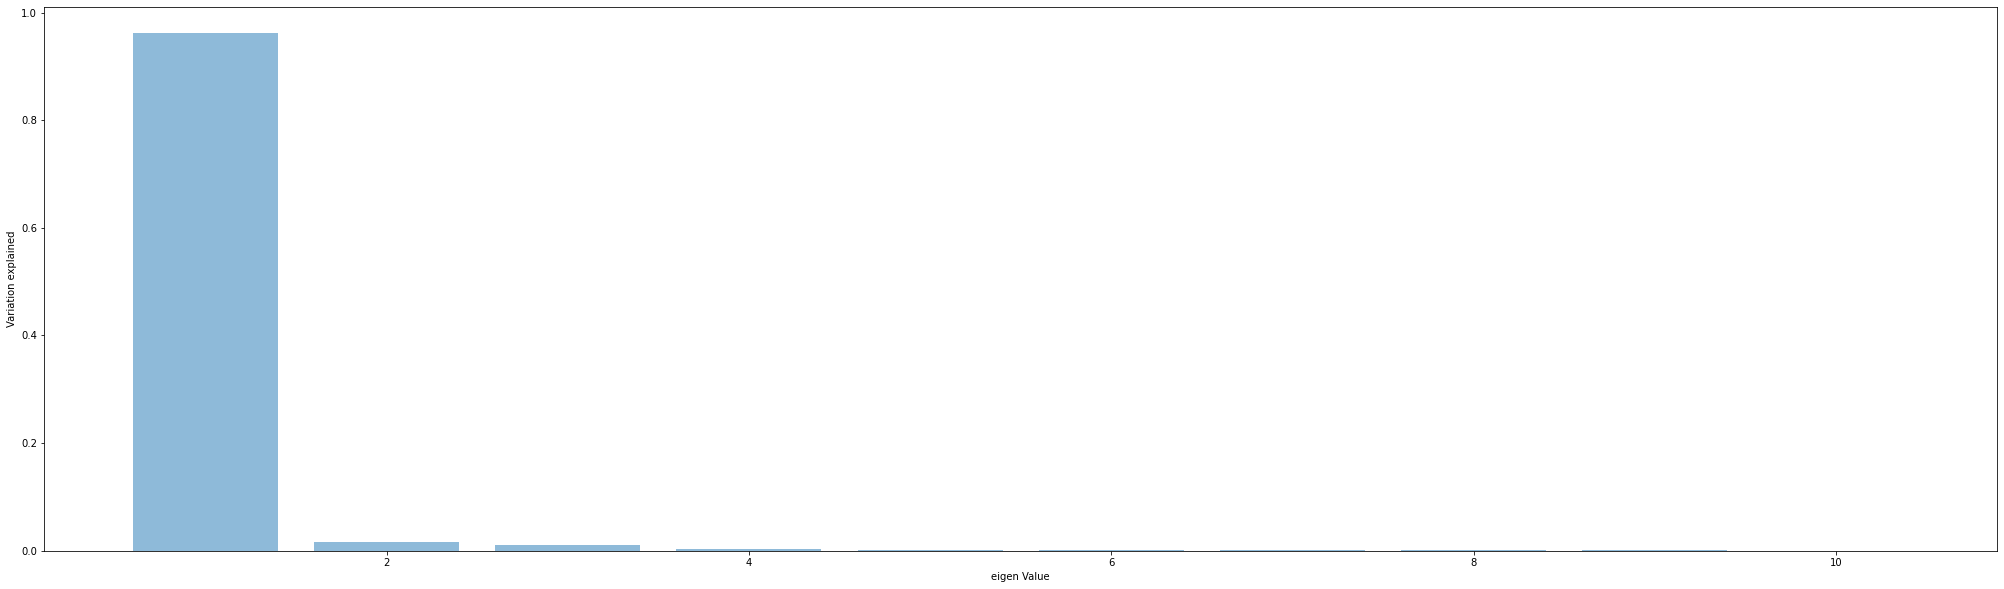

In [72]:
#Visualising Cumulative Variance
plt.figure(figsize = (35,10))
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

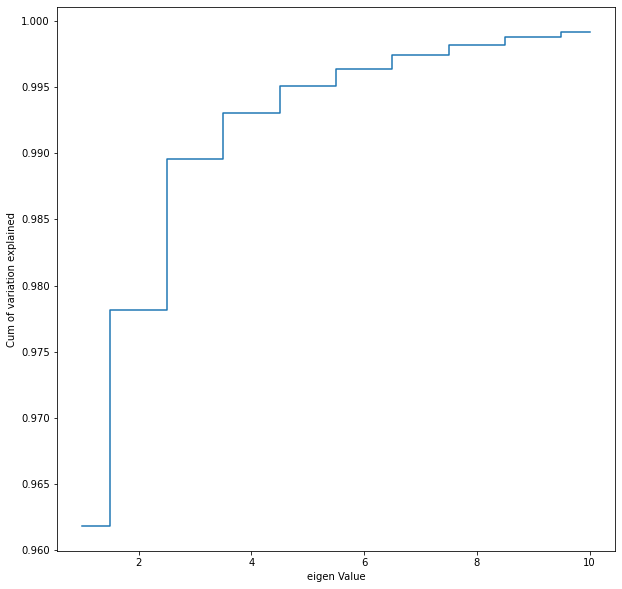

In [73]:
plt.figure(figsize = (10,10))
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

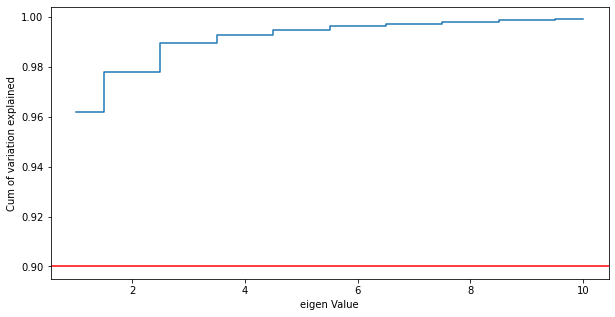

In [74]:
plt.figure(figsize = (10,5))
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.show()

##### Red line Indicates the Threshold

### Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

In [75]:
#Now 3 dimensions seems very reasonable

In [76]:
pca3 = PCA(n_components=3)
pca3.fit(XStd)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XStd)

[[ 0.27528369  0.29325847  0.30460913  0.26760688  0.08050399  0.09727569
   0.31709275 -0.31413315  0.31395906  0.2828309   0.30928036  0.31378846
   0.27204749 -0.02081377  0.04145551  0.05822502  0.03027951  0.07414539]
 [-0.12695376  0.12557673 -0.07295164 -0.18963438 -0.12217486  0.01074829
   0.04811814  0.01274985  0.05993525  0.11622053  0.06228062  0.05378436
   0.20923317  0.48852515 -0.05508997 -0.12408509 -0.54091477 -0.54035426]
 [-0.11992248 -0.02482055 -0.05601432  0.27507421  0.64201297  0.5918013
  -0.09762831  0.05764844 -0.10951242 -0.0170642   0.05632398 -0.10884073
  -0.03146365  0.28627701 -0.11567935 -0.07528289  0.00873592  0.03952427]]
[0.52186034 0.16729768 0.10562639]


In [77]:
Xpca3

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587403e-02],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333104e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003196e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136076e-01]])

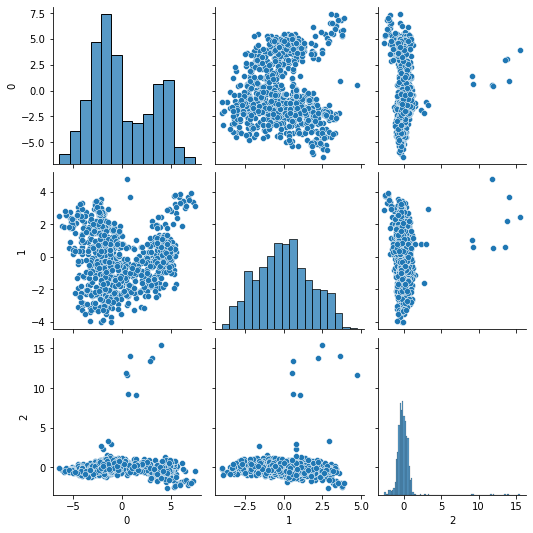

In [78]:
sns.pairplot(pd.DataFrame(Xpca3))

### Train SVM model on components selected from above step

In [79]:
pca3 = PCA(n_components=3)
pca3.fit(XStd)
X_t_train = pca3.transform(X_train)
X_t_test = pca3.transform(X_test)
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_t_train, Y_train)
y_Pred= clf.predict(X_t_test)

In [80]:
y_Pred

array(['van', 'bus', 'car', 'car', 'car', 'car', 'car', 'van', 'car',
       'van', 'car', 'van', 'van', 'car', 'car', 'car', 'van', 'bus',
       'van', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'bus', 'car', 'bus', 'car', 'bus', 'car', 'car', 'car',
       'car', 'car', 'van', 'car', 'car', 'car', 'bus', 'car', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'car', 'bus',
       'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'van', 'van',
       'car', 'bus', 'bus', 'car', 'car', 'bus', 'bus', 'car', 'van',
       'van', 'car', 'car', 'bus', 'car', 'van', 'car', 'car', 'bus',
       'car', 'bus', 'van', 'car', 'van', 'van', 'car', 'bus', 'car',
       'car', 'car', 'car', 'van', 'van', 'van', 'car', 'car', 'bus',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'van', 'van', 'car', 'car', 'van', 'car', 'van', 'van', 'car',
       'car', 'car',

### Print Classification metrics for train data of above model and share insights

In [81]:
print(classification_report(Y_test, y_Pred))

              precision    recall  f1-score   support

         bus       0.63      0.53      0.57        59
         car       0.71      0.83      0.77       133
         van       0.69      0.55      0.61        62

    accuracy                           0.69       254
   macro avg       0.68      0.64      0.65       254
weighted avg       0.69      0.69      0.69       254



#### The Accuracy Increased from 54% to 69% by Using PCA
#### F1 Scores are also Improved Comparing to Old SVM trained data

-----

## 4. Performance Improvement

### Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [82]:
pca4 = PCA(n_components=3)
pca4.fit(XStd)
X_t_train1 = pca4.transform(X_train)
X_t_test1 = pca4.transform(X_test)
clf = svm.SVC(gamma=0.001, C=5)
clf.fit(X_t_train, Y_train)
y_Pred1= clf.predict(X_t_test)
print(accuracy_score(Y_test, y_Pred1))

0.7677165354330708


### best Parameters observed from above step

##### C= .001

##### gamma = .001

### C. Print Classification metrics for train data of above model

In [83]:
print(classification_report(Y_test, y_Pred1))

              precision    recall  f1-score   support

         bus       0.75      0.66      0.70        59
         car       0.82      0.83      0.83       133
         van       0.67      0.73      0.70        62

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



In [84]:
#previous Classification Report 
print(classification_report(Y_test, y_Pred))

              precision    recall  f1-score   support

         bus       0.63      0.53      0.57        59
         car       0.71      0.83      0.77       133
         van       0.69      0.55      0.61        62

    accuracy                           0.69       254
   macro avg       0.68      0.64      0.65       254
weighted avg       0.69      0.69      0.69       254



##### The preformance of the New model has increased from 69% to 77% by hyper parameter tuning
##### The Precision score is improved for the tuned SVM model
##### The Recall score is Better for Tuned SVM model

------

## 5. Data Understanding & Cleaning

### Pre-requisite/assumptions of PCA

1. There must be linearity in the data set. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.

2. PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. 

3. All variables should be accessed on the same ratio level of measurement (The most preferred norm is at least 150 observations of the sample set with a ratio measurement of 5:1)

4.  Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less.

5. The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

6. PCA effectiveness depends upon the scales of the attributes.

### Advantages and limitations of PCA.

#### Advantages

1. Removes Correlated Features
2. Speeds up other machine learning algorithms
3. Reduces Overfitting
4. Improves Visualization
5. Counteracts the issues of high-dimensional data

#### Disadvatages

1. Independent variables become less interpretable, Low interpretability of principal components.
2. Data standardization is must before PCA
3. The trade-off between information loss and dimensionality reduction.

--------